In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/prostate-cancer/Prostate_Cancer.csv


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# **Objective: generate models for predicting prostate cancer based on indicators**

## 1. Import and check the Dataset

In [3]:
# Read data

data = pd.read_csv('../input/prostate-cancer/Prostate_Cancer.csv')

In [4]:
data.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


There is no missing data.

In [6]:
data.describe()

,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,16.850000,18.230000,96.780000,702.880000,0.102730,0.126700,0.193170,0.064690
std,29.011492,4.879094,5.192954,23.676089,319.710895,0.014642,0.061144,0.030785,0.008151
min,1.000000,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,25.750000,12.000000,14.000000,82.500000,476.750000,0.093500,0.080500,0.172000,0.059000
50%,50.500000,17.000000,17.500000,94.000000,644.000000,0.102000,0.118500,0.190000,0.063000
75%,75.250000,21.000000,22.250000,114.250000,917.000000,0.112000,0.157000,0.209000,0.069000
max,100.000000,25.000000,27.000000,172.000000,1878.000000,0.143000,0.345000,0.304000,0.097000


The id column can be eliminated. This column adds no value to the data.

In [7]:
data = data.drop(['id'], axis=1)

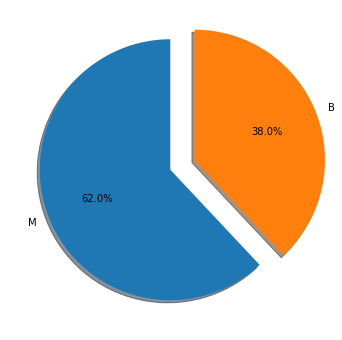

In [8]:
data_dr = data['diagnosis_result'].value_counts()

label = [data_dr.index.tolist()]
plt.pie(data_dr, labels=label[0], shadow=True, explode=(0.0, 0.2), autopct='%1.1f%%', startangle=90)
plt.gcf().set_size_inches(12,6)
plt.show()

The majority number of cases is found to be maligne. 
This variable can be set to 0 for maligne and 1 for benigne.

In [9]:
data['diagnosis_result'].replace({'M':0,'B':1},inplace=True)

In [10]:
# Data correlation matrix
corr_metrics = data.corr()
corr_metrics.style.background_gradient()

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
diagnosis_result,1.000000,0.176967,-0.070735,-0.607498,-0.562444,-0.197616,-0.512234,-0.233028,-0.008180
radius,0.176967,1.000000,0.100245,-0.238216,-0.250934,-0.127121,-0.191490,-0.039707,-0.029120
texture,-0.070735,0.100245,1.000000,-0.113453,-0.113725,0.102321,0.032446,0.077912,0.139157
perimeter,-0.607498,-0.238216,-0.113453,1.000000,0.976648,0.269442,0.527542,0.195539,-0.195434
area,-0.562444,-0.250934,-0.113725,0.976648,1.000000,0.208438,0.424950,0.110435,-0.274344
smoothness,-0.197616,-0.127121,0.102321,0.269442,0.208438,1.000000,0.465723,0.424203,0.369580
compactness,-0.512234,-0.191490,0.032446,0.527542,0.424950,0.465723,1.000000,0.681123,0.647953
symmetry,-0.233028,-0.039707,0.077912,0.195539,0.110435,0.424203,0.681123,1.000000,0.568608
fractal_dimension,-0.008180,-0.029120,0.139157,-0.195434,-0.274344,0.369580,0.647953,0.568608,1.000000


Fractal dimension and texture present a low correlation with the remaining variables. Therefore we can eliminate them from our DB.
Additional, because perimeter and area have a strong correlation, it will be elimintated to avoid redudancy.

In [11]:
data = data.drop(['fractal_dimension', 'texture', 'perimeter'], axis=1)

### 2. Train & test sets

In [12]:
# split the data in train and test function

from sklearn.model_selection import train_test_split

X = data.drop(['diagnosis_result'], axis=1) # Features
y = data['diagnosis_result'] # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)

### 3. ML models

In [13]:
# Logistic Regression model

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
pred_log = logreg.predict(X_test)

In [14]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 50)
forest.fit(X_train,y_train)
pred_forest = forest.predict(X_test)

In [15]:
# KNeighbors Classifier

from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=2)
kn.fit(X_train,y_train)
pred_kn = kn.predict(X_test)

In [16]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
pred_tree = tree.predict(X_test)

In [17]:
from sklearn.metrics import classification_report

class_rep_log = classification_report(y_test, pred_log)
class_rep_forest = classification_report(y_test, pred_forest)
class_rep_kn = classification_report(y_test, pred_kn)
class_rep_tree = classification_report(y_test, pred_tree)

print("Logistic Regression: \n", class_rep_log)
print("Forest Classifier: \n", class_rep_forest)
print("KNeighbors Classifier: \n", class_rep_kn)
print("Decision Tree: \n", class_rep_tree)

Logistic Regression: 
               precision    recall  f1-score   support

           0       0.75      0.67      0.71         9
           1       0.75      0.82      0.78        11

    accuracy                           0.75        20
   macro avg       0.75      0.74      0.74        20
weighted avg       0.75      0.75      0.75        20

Forest Classifier: 
               precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.91      0.91      0.91        11

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20

KNeighbors Classifier: 
               precision    recall  f1-score   support

           0       0.54      0.78      0.64         9
           1       0.71      0.45      0.56        11

    accuracy                           0.60        20
   macro avg       0.63      0.62      0.60        20
weigh

The Forest Classificatio model has the highest average precision of 0.9, and both variables are well balanced (benigne: 1 and maligne: 0). 

The Decision Tree model has also a good average precision. However in this model the maligne results are better classified.

In [18]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(10)

logit_score = cross_val_score(logreg, X, y, cv=kf)
forest_score = cross_val_score(forest, X, y, cv=kf)
KNeighbors_score = cross_val_score(kn, X, y, cv=kf)
tree_score = cross_val_score(tree, X, y, cv=kf)


# Print the mean of each array of scores
print("Logistic Regression:", np.mean(logit_score), '\n'
      "Forest Classification:", np.mean(forest_score), '\n'
      "KNeighbors Classification:", np.mean(KNeighbors_score), '\n'
      "Decision Tree:", np.mean(tree_score), '\n'
     )

Logistic Regression: 0.8 
Forest Classification: 0.86 
KNeighbors Classification: 0.7100000000000001 
Decision Tree: 0.8699999999999999 



The highest score is obtained with the Forest Classification, followed by the Decision tree.